In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

%debug

ERROR:root:No traceback has been produced, nothing to debug.


In [2]:
import sys
sys.path.insert(0, "../../code-previous")

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [54]:
import pandas as pd
import numpy as np
import networkx as nx
import sklearn.feature_extraction as skfeatures
import time
import os

import operator
import pickle
import string
import swifter
import nltk
stopwords = nltk.corpus.stopwords.words('english')


import plotly
import plotly.plotly as py

import plotly.graph_objs as go
plotly.tools.set_credentials_file(username='sreejith_s', api_key='rcet0rTqFCc3WeOzWTjv')

from sklearn.feature_extraction.text import CountVectorizer
# plotly.tools.set_credentials_file(username='srjit', api_key='lpKtXjzR7LBaqHwlxFQp')


from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter

from unicodedata import category
from tqdm import tqdm
tqdm.pandas(desc="Progress")

import seaborn as sns
sns.set_style()

import matplotlib.pylab as plt

In [4]:
#disciplines = ["Architecture","Art","Humanities, Multidisciplinary","Folklore","Medieval & Renaissance Studies","Asian Studies","Classics","Dance","Film, Radio, Television","History","History & Philosophy of Science","Literary Theory & Criticism","Literary Reviews","Literature","Literature, African, Australian, Canadian","Literature, American","Literature, British Isles","Literature, German, Dutch, Scandinavian","Literature, Romance","Literature, Slavic","Poetry","Music","Philosophy","Religion","Theater","Agriculture, Dairy & Animal Science","Agricultural Engineering","Agricultural Economics & Policy","Agriculture, Multidisciplinary","Agronomy","Horticulture","Soil Science","Allergy","Anatomy & Morphology","Anesthesiology","Anthropology","Audiology & Speech-Language Pathology","Behavioral Sciences","Biochemical Research Methods","Biochemistry & Molecular Biology","Biodiversity Conservation","Biophysics","Biotechnology & Applied Microbiology","Cardiac & Cardiovascular Systems","Peripheral Vascular Disease","Cell & Tissue Engineering","Cell Biology","Dentistry, Oral Surgery & Medicine","Dermatology","Developmental Biology","Emergency Medicine","Andrology","Endocrinology & Metabolism","Entomology","Ecology","Environmental Sciences","Environmental Studies","Evolutionary Biology","Fisheries","Food Science & Technology","Forestry","Gastroenterology & Hepatology","Critical Care Medicine","Primary Health Care","Medicine, General & Internal","Genetics & Heredity","Geriatrics & Gerontology","Gerontology","Health Care Sciences & Services","Health Policy & Services","Hematology","Immunology","Infectious Diseases","Integrative & Complementary Medicine","Medicine, Legal","Biology","Limnology","Marine & Freshwater Biology","Mathematical & Computational Biology","Medical Ethics","Medical Informatics","Medical Laboratory Technology","Microbiology","Mycology","Clinical Neurology","Neurosciences","Neuroimaging","Nursing","Nutrition & Dietetics","Obstetrics & Gynecology","Oncology","Ophthalmology","Orthopedics","Otorhinolaryngology","Paleontology","Parasitology","Pathology","Pediatrics","Chemistry, Medicinal","Pharmacology & Pharmacy","Physiology","Plant Sciences","Psychiatry","Public, Environmental & Occupational Health","Radiology, Nuclear Medicine & Medical Imaging","Rehabilitation","Reproductive Biology","Medicine, Research & Experimental","Respiratory System","Rheumatology","Sport Sciences","Substance Abuse","Surgery","Toxicology","Transplantation","Tropical Medicine","Urology & Nephrology","Veterinary Sciences","Virology","Ornithology","Zoology","Astronomy & Astrophysics","Chemistry, Applied","Chemistry, Multidisciplinary","Chemistry, Analytical","Chemistry, Inorganic & Nuclear","Chemistry, Organic","Chemistry, Physical","Crystallography","Electrochemistry","Geochemistry & Geophysics","Geology","Geosciences, Multidisciplinary","Mathematics, Applied","Mathematics, Interdisciplinary Applications","Mathematics","Statistics & Probability","Meteorology & Atmospheric Sciences","Mineralogy","Mining & Mineral Processing","Oceanography","Optics","Geography, Physical","Physics, Applied","Physics, Fluids & Plasmas","Physics, Atomic, Molecular & Chemical","Physics, Multidisciplinary","Physics, Condensed Matter","Physics, Nuclear","Physics, Particles & Fields","Physics, Mathematical","Polymer Science","Thermodynamics","Water Resources","Nanoscience & Nanotechnology","Logic","Multidisciplinary Sciences","Acoustics","Automation & Control Systems","Computer Science, Artificial Intelligence","Computer Science, Cybernetics","Computer Science, Hardware & Architecture","Computer Science, Information Systems","Computer Science, Interdisciplinary Applications","Computer Science, Software Engineering","Computer Science, Theory & Methods","Construction & Building Technology","Energy & Fuels","Engineering, Aerospace","Engineering, Multidisciplinary","Engineering, Biomedical","Engineering, Environmental","Engineering, Chemical","Engineering, Industrial","Engineering, Manufacturing","Engineering, Marine","Engineering, Civil","Engineering, Ocean","Engineering, Petroleum","Engineering, Electrical & Electronic","Engineering, Mechanical","Engineering, Geological","Ergonomics","Imaging Science & Photographic Technology","Information Science & Library Science","Instruments & Instrumentation","Materials Science, Paper & Wood","Materials Science, Ceramics","Materials Science, Multidisciplinary","Materials Science, Biomaterials","Materials Science, Characterization & Testing","Materials Science, Coatings & Films","Materials Science, Composites","Materials Science, Textiles","Mechanics","Metallurgy & Metallurgical Engineering","Microscopy","Nuclear Science & Technology","Operations Research & Management Science","Remote Sensing","Robotics","Spectroscopy","Telecommunications","Transportation","Transportation Science & Technology","Archaeology","Area Studies","Social Sciences, Biomedical","Business","Business, Finance","Economics","Industrial Relations & Labor","Management","Communication","Criminology & Penology","Cultural Studies","Demography","Education & Educational Research","Education, Scientific Disciplines","Education, Special","Ethnic Studies","Family Studies","Geography","Law","Political Science","International Relations","Linguistics","Language & Linguistics","Social Sciences, Mathematical Methods","Psychology, Biological","Psychology, Clinical","Psychology, Educational","Psychology, Developmental","Psychology, Applied","Psychology","Psychology, Multidisciplinary","Psychology, Psychoanalysis","Psychology, Mathematical","Psychology, Experimental","Psychology, Social","Planning & Development","Public Administration","Social Issues","Ethics","History of Social Sciences","Hospitality, Leisure, Sport & Tourism","Social Sciences, Interdisciplinary","Social Work","Sociology","Urban Studies","Women's Studies"]

In [5]:
#data = None

In [6]:
#data_grouped_by_label["title_words_"] = data_grouped_by_label["title_without_stopwords"].progress_apply(lambda x: " ".join(x))

Progress: 100%|██████████| 249/249 [00:11<00:00, 21.84it/s]


In [ ]:
# def num_there(w):
#     return any(i.isdigit() for i in w)


# def clean_digits(s):
#     t = s.split()
#     cleaned = " ".join([x for x in t if not num_there(x)])
#     return cleaned

# data_grouped_by_label["title_words"] = data_grouped_by_label["title_words_"].progress_apply(lambda x: clean_digits(x))

Progress:  27%|██▋       | 66/249 [04:29<08:05,  2.65s/it]  

In [5]:
filename = "/mnt/disks/vault/analysis-data/interdisciplinary-novelty-analysis/corrected-entropy-analysis/all-data-grouped.pql"
# pickle_out = open(filename,"wb")
# pickle.dump(data_grouped_by_label, pickle_out)
# pickle_out.close()

pickle_in = open(filename,"rb")
data_grouped_by_label = pickle.load(pickle_in)

In [6]:
data_grouped_by_label.head()

,title_without_stopwords,cleaned_titles,before_distinct,after_distinct,title_words,title_words_
Label,,,,,,
Acoustics,"[multiplexer using flat exponential filters, p...",[reconstruction blockage duct from single spec...,135162,134681,reconstruction blockage duct from single spect...,reconstruction blockage duct from single spect...
Agricultural Economics & Policy,"[poultry eggs, accounting commodity credit cor...",[problems project level monitoring evaluation ...,24188,24045,problems project level monitoring evaluation e...,problems project level monitoring evaluation e...
Agricultural Engineering,"[soft energy from palm wastes, potential land ...","[, experimental study mathematical model soya ...",52749,52719,experimental study mathematical model soya bea...,experimental study mathematical model soya be...
"Agriculture, Dairy & Animal Science",[collection 2 cell embryos their culture media...,"[, effect some factors performance value asses...",206712,206459,effect some factors performance value assessme...,effect some factors performance value assessm...
"Agriculture, Multidisciplinary",[response strawberry fruit yield plant populat...,"[, ionophores antibiotics feedlot steers, opti...",198004,196294,ionophores antibiotics feedlot steers optimum ...,ionophores antibiotics feedlot steers optimum...


In [7]:
vectorizer = CountVectorizer()
vectorized_words = vectorizer.fit_transform(data_grouped_by_label.title_words)

In [ ]:
vectorizer

In [7]:
# pickle_out = open("/mnt/disks/vault/analysis-data/interdisciplinary-novelty-analysis/corrected-entropy-analysis/vectorizer.pql","wb")
# pickle.dump(vectorizer, pickle_out)
# pickle_out.close()

# pickle_out = open("/mnt/disks/vault/analysis-data/interdisciplinary-novelty-analysis/corrected-entropy-analysis/vectorized_words.pql","wb")
# pickle.dump(vectorized_words, pickle_out)
# pickle_out.close()

In [8]:
# vectorizer_filename = "/mnt/disks/vault/analysis-data/interdisciplinary-novelty-analysis/corrected-entropy-analysis/vectorizer.pickle"
# pickle_in = open(filename,"rb")
# vectorizer = pickle.load(pickle_in)


# vectorized_words_filename = "/mnt/disks/vault/analysis-data/interdisciplinary-novelty-analysis/corrected-entropy-analysis/vectorized_words.pickle"
# pickle_in = open(filename,"rb")
# vectorized_words = pickle.load(pickle_in)

In [23]:
reverse_vocabulary = {value:key for key,value in vectorizer.vocabulary_.items()}

# collect the words in order in which they appear
words = [reverse_vocabulary[i] for i in range(len(reverse_vocabulary.keys()))]

In [8]:
print(vectorizer.vocabulary_['where'])
print(vectorizer.vocabulary_['when'])
print(vectorizer.vocabulary_['there'])
print(vectorizer.vocabulary_['here'])

1992206
1992191
1831567
810222


In [9]:
print(vectorizer.vocabulary_['quarks'])
print(vectorizer.vocabulary_['zyplast'])
print(vectorizer.vocabulary_['zymosan'])
print(vectorizer.vocabulary_['nannofossil'])

1555492
2033979
2033932
1218128


In [10]:
print(vectorizer.vocabulary_['tomography'])
print(vectorizer.vocabulary_['mantle'])
print(vectorizer.vocabulary_['gps'])
print(vectorizer.vocabulary_['cancer'])

1861322
1086642
762292
284615


__Iterate through the columns of the vectorized words__

In [11]:
# https://stackoverflow.com/questions/19201972/can-numpy-bincount-work-with-2d-arrays
idx = 0
a = vectorized_words.transpose()
b = a.toarray()

In [12]:
vectorized_words.shape

(249, 2034183)

__Average term frequency__

In [19]:
# number of documents where tf is > 0
Nc = np.squeeze(np.asarray((vectorized_words != 0).sum(0)))

tfs = np.squeeze(np.asarray(vectorized_words.sum(axis=0).reshape(-1,)))
                
# sum of all the words / number of documents where the word is present
avg_tfs_ =  tfs/ Nc
avg_tfs = [np.round(x, 3) for x in avg_tfs_]

In [14]:
np.array(avg_tfs)

array([15.636,  8.191,  1.75 , ...,  1.   ,  2.   ,  1.   ])

__Is this correct?__  Compare term frequency of "where", "when", "there", "here"

with that of "quarks", "zyplast"...

In [57]:
# common words avg tf
print(Nc[1992206], Nc[1992191], Nc[1831567], Nc[810222])
print(tfs[1992206], tfs[1992191], tfs[1831567], tfs[810222])


print(avg_tf[1992206], avg_tf[1992191], avg_tf[1831567], avg_tf[810222])

241 241 239 218
27787 76128 24826 5303
115.29875518672199 315.8838174273859 103.8744769874477 24.325688073394495


In [56]:
# not really common words
print(Nc[1555492], Nc[2033979], Nc[2033932], Nc[1218128])
print(tfs[1555492], tfs[2033979], tfs[2033932], tfs[1218128])

print(avg_tf[1555492], avg_tf[2033979], avg_tf[2033932], avg_tf[1218128])

56 7 68 12
5265 16 1440 633
94.01785714285714 2.2857142857142856 21.176470588235293 52.75


In [61]:
# Calculating entropy of a single word
word = "where"
index = vectorizer.vocabulary_[word]

print("index is:", index)
# present in a lot of places
present_indices = b[index,:]
print(b[index,:])

# Number of disciplines in which this is present
present_disc = [count for count in present_indices if count > 0]
print("Present in ", len(present_disc))

index is: 1992206
[  17   31    5   28   53  106   36   12    2  103  124   36    1   61
    5    9  242   25   44  137   37  319   81  150   43   80  431  274
  232   10  174   76   77  514   41  431  161  273    0  227  112   47
   18  126  138   48  159   81   22   92   99  105   21    0   45   75
   55   22  218  517  727  132   89   47   91  114  160   45   31  220
  105  271   50    5   97   32   16  170  149   10   77   67  227  172
   30   77   22   64   87    6   33    1  124   57  171  111   55  184
   43  138  118   82   43  271  177   96   77   60   14   36   68   15
  203   88  144  272   81   16  168   85  532    8  145    5    0   16
    0    0    0    2    2    6  280   51    4   19   11   21    1  206
   57    7   44  330   70   40   24   29   19   34  718   30  118    1
  150   54  101    5   24   45  631    3    1   23   41  413   56  213
  108  156   48  304  106   67   64   13   84   31   10   47   62  192
   96  272   36  105  104  124   10   35  219   60   89   5

In [16]:
l = b[index,:].tolist()
#where all are it zero

zero_count_discipline_indices = [idx for idx, count in enumerate(l) if count == 0]
print(zero_count_discipline_indices)

data_grouped_by_label.iloc[zero_count_discipline_indices[2]].title_words

#data_grouped_by_label.iloc[zero_count_discipline_indices[0]].title_without_stopwords

data_grouped_by_label.reset_index().iloc[zero_count_discipline_indices[1]]

[38, 53, 124, 126, 127, 128, 196, 235]


Label                                                                  Dance
title_without_stopwords    [dancing stories  community dance residency ho...
cleaned_titles             [kinematic kinetic analyses toes dance movemen...
before_distinct                                                          154
after_distinct                                                           154
title_words                kinematic kinetic analyses toes dance movement...
title_words_               kinematic kinetic analyses toes dance movement...
Name: 53, dtype: object

In [62]:
# unique, _counts1 = np.unique(np.array(present_disc), return_counts=True)
# freq_term = unique * _counts1 

# # 40635 for where
# print("Total term frequency", np.sum(freq_term)) 

# # In 3 disciplines the word occurs once
# print(unique, "\n", _counts1)

# # sum of counts will the number of present disciplines
# print("Present in: ", sum(_counts1), " disciplines")

# # Nc
# Nc = float(b.shape[1])
# qcs = _counts1/Nc
# log_qcs = np.log(qcs)



# print(np.array(_counts1)/Nc)
# entropy = -1 * np.sum(qcs * log_qcs)   

# print("Entropy is:", entropy)


In [15]:
Nc[0]

165

In [16]:
Nc.shape

(2034183,)

__Calculating entropies for every word from the vectorizer__

In [17]:
uniques = []
counts = []
entropies = []
tfs = []

for i in range(b.shape[0]):
    
    unique, _counts = np.unique(b[i], return_counts=True)
    
    # eliminate unique of 0 if present - term frequency from 1 to max(tfc)
    if 0 in unique:
        unique = unique[1:]
        _counts = _counts[1:]
    
   
    uniques.append(unique)
    counts.append(_counts)
      
    qcs = _counts/float(Nc[i])
    ln_qcs = np.log(qcs)
    
    entropy_ = -1 * np.sum(qcs * ln_qcs) 
    entropy = np.round(entropy_, 3)
    entropies.append(entropy)

__We have entropies and average term frequencies - lets plot!__

In [20]:
log_avg_tfs_ = np.log(avg_tfs)
log_avg_tfs = [np.round(x, 3) for x in log_avg_tfs_]
entropies = np.array(entropies)

In [21]:
len(entropies)

2034183

In [24]:
# lets sample 50000 points 
import random
random_indices = [random.randint(0,len(entropies)) for i in range(1000)]

random_indices = sorted(random_indices)

_avgtfs_sample = [log_avg_tfs[i] for i in random_indices]
_entropies_sample = [entropies[j] for j in random_indices]
_words_sample = [words[k] for k in random_indices]


In [25]:
len(_avgtfs_sample)
len(_entropies_sample)
len(_words_sample)

1000

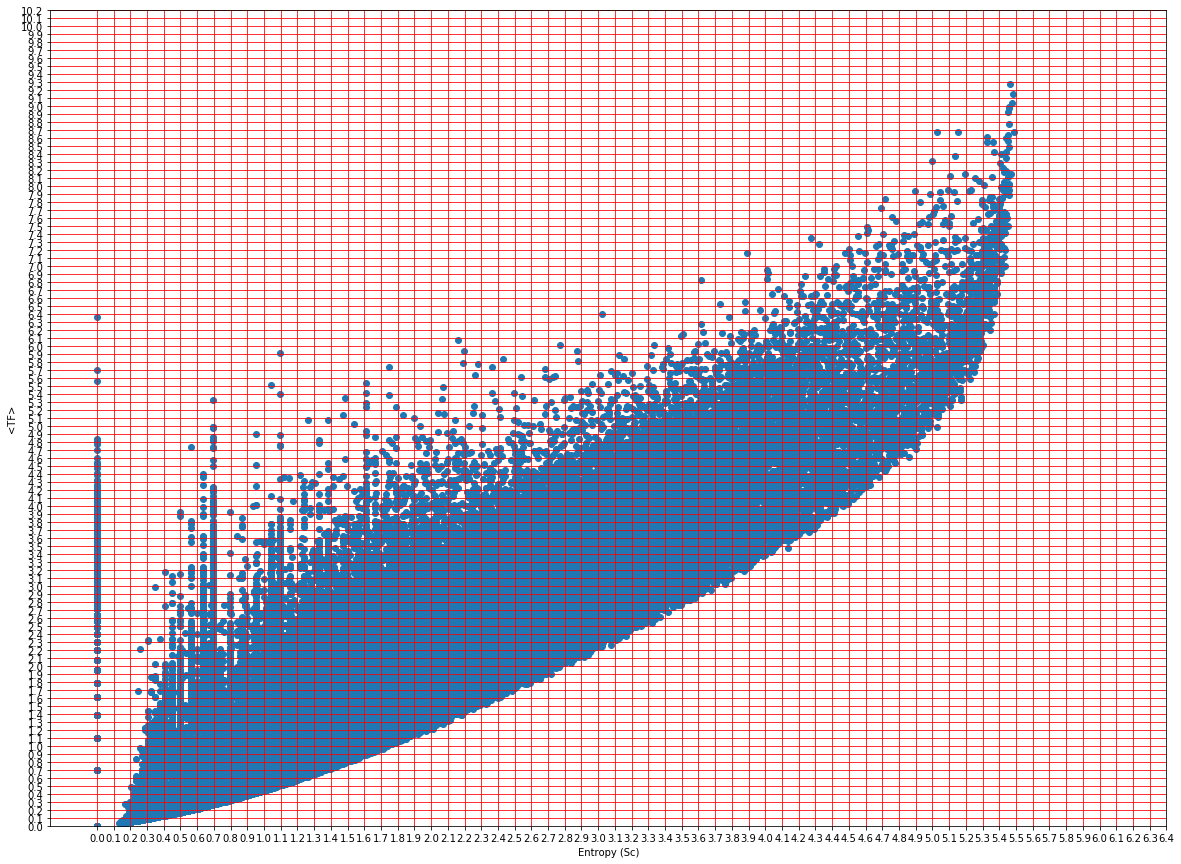

In [26]:
plt.figure(figsize=(20,15))
plt.scatter(entropies, 
         log_avg_tfs)
plt.ylim(ymin=0)

plt.xticks(np.arange(min(entropies), max(entropies)+1, 0.1))
plt.yticks(np.arange(min(log_avg_tfs), max(log_avg_tfs)+1, 0.1))

plt.grid(color="red")
plt.xlabel("Entropy (Sc)")
plt.ylabel("<TF>")
plt.show() 

In [27]:
type(words)

list

In [171]:
points = [(entropies[i], log_avg_tfs[i]) for i in range(len(log_avg_tfs))]

word_indices = [index for index, point in enumerate(points) if ((point[0]>2.3 and point[0]<2.5) and (point[1]>1.7 and point[1]<1.9))]
[words[i] for i in word_indices]

['abbreviata',
 'abuses',
 'accomplishments',
 'accredited',
 'acidotic',
 'acta',
 'additively',
 'addresses',
 'adelaide',
 'adhere',
 'adhered',
 'adventures',
 'aeolotropic',
 'aff',
 'affluent',
 'affords',
 'afraid',
 'agnps',
 'alerting',
 'alliin',
 'amid',
 'amorpha',
 'amygdali',
 'anatinus',
 'andalusia',
 'andersen',
 'angiopoietins',
 'anise',
 'anyway',
 'appalachia',
 'architects',
 'archived',
 'armenia',
 'armored',
 'artemis',
 'artifactual',
 'arylesterase',
 'aschoff',
 'ase',
 'aspo',
 'assassination',
 'assuming',
 'atratus',
 'attainable',
 'australasia',
 'automate',
 'ay',
 'baden',
 'bahrain',
 'bailey',
 'bal',
 'bali',
 'ballasted',
 'bangalore',
 'bas',
 'basel',
 'baselines',
 'bathurst',
 'battlefield',
 'bedrest',
 'beholder',
 'believing',
 'berg',
 'bernacchii',
 'bieb',
 'biofabrication',
 'bizarre',
 'bloody',
 'boats',
 'bont',
 'bordeaux',
 'botanicals',
 'braiding',
 'brokering',
 'builders',
 'bypassing',
 'bystanders',
 'calm',
 'came',
 'camouf

In [29]:
_e = pd.Series(entropies, name="Entropy").reset_index()
_tf = pd.Series(log_avg_tfs, name="Frequency").reset_index()
_words = pd.Series(words, name="Marker").reset_index()
graph_data = pd.concat([_e, _tf, _words], axis=1)

In [30]:
graph_data.to_csv("/mnt/disks/vault/analysis-data/interdisciplinary-novelty-analysis/corrected-entropy-analysis/entropy_avgtf.csv")

In [64]:
print(entropies[1861322], log_avg_tfs[1861322], words[1861322])

print(entropies[284615], log_avg_tfs[284615], words[284615])

print(entropies[1086642], log_avg_tfs[1086642], words[1086642])

4.872 6.245 tomography
5.105 8.129 cancer
3.412 4.962 mantle


In [61]:
import random

random_indices = [random.randint(0,len(_e)) for i in range(450000)]

random_indices = sorted(random_indices)


_e_samples = [entropies[idx] for idx in random_indices]
_tf_samples = [log_avg_tfs[idx] for idx in random_indices]
_words_samples = [words[idx] for idx in random_indices]

In [62]:
# avoid terms with very high term freq
trace0 = go.Scattergl(
    x = _e_samples,
    y = _tf_samples,
    mode = 'markers',
    text = _words_samples,
    marker = dict(
        color = '#FFBAD2',
        line = dict(width = 1)
    )
)


layout= go.Layout(
    title= 'Entropy - Tf plot',
    hovermode= 'closest',
    xaxis= dict(
        title= 'Entropy',
        ticklen= 5,
        zeroline= False,
        gridwidth= 2,
    ),
    yaxis=dict(
        title= '<TF>',
        ticklen= 5,
        gridwidth= 2,
    ),
    
    showlegend= False
)

plotdata = [trace0]


fig= go.Figure(data=plotdata, layout=layout)
py.iplot(fig)

/usr/local/lib/python3.6/dist-packages/IPython/core/display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



In [ ]:
4.872, 6.245

__--------------------------------  END OF NOTEBOOK -------------------------------__

In [64]:
# average term frequencies
term_frequencies_ = vectorized_words.sum(axis=0).reshape(-1,).tolist()[0]
average_term_frequencies = np.array(term_frequencies_)/vectorized_words.shape[0]

__Let us see the range of entropies of common words__

In [65]:
print(entropies[1992206], entropies[1992191], entropies[1831567], entropies[810222])
print(term_frequencies_[1992206], term_frequencies_[1992191], term_frequencies_[1831567], term_frequencies_[810222])

5.003033351445813 5.369806123393971 4.873012653711566 4.043206974650844
27787 76128 24826 5303


__These words are low entropy words - Not Very Common__

In [81]:
print(entropies[1555492], entropies[2033979], entropies[2033932], entropies[1218128])
term_frequencies_[1555492], term_frequencies_[2033979], term_frequencies_[2033932], term_frequencies_[1218128]

-2.3305006683705414 -121.69121316818793 0.32644650202360737 -56.89447292469113


(5265, 16, 1440, 633)

__Other words__

In [67]:
print(entropies[1861322], entropies[1086642], entropies[762292], entropies[284615])
print(term_frequencies_[1861322], term_frequencies_[1086642], term_frequencies_[762292], term_frequencies_[284615])

5.180652643266769 3.761490780653687 3.4952324294011228 5.281557345858954
108810 23852 3819 793972


__So, shouldn't we be looking at the bottom left part of the plot?__

In [68]:
np.min(average_term_frequencies)

0.004016064257028112

In [69]:
977/249

3.923694779116466

In [70]:
average_term_frequencies[1218128]

2.5421686746987953

In [71]:
selected_words_with_indices = [(index, avg_freq) for index, avg_freq in enumerate(average_term_frequencies) if avg_freq > 1]

In [72]:
selected_words = [words[index] for index, avg_freq in selected_words_with_indices]
selected_word_tfs = [freq for (index,freq) in selected_words_with_indices]
selected_word_indices = [index for index, freq in selected_words_with_indices]
selected_word_entropies = [entropies[index] for index in selected_word_indices]

In [73]:
# Tomography is present
print(1992206 in selected_word_indices)

# mantle is present
print(1086642 in selected_word_indices)

True
True


In [74]:
# Location of these words
print(selected_word_indices.index(1992206))
print(selected_word_indices.index(1086642))

63071
33794


__Plotting entropy to term frequency__

In [75]:
len(selected_words)

63987

In [77]:
trace0 = go.Scatter(
    x = selected_word_entropies,
    y = selected_word_tfs,
    mode = 'markers',
    text = selected_words,
    marker = dict(
        color = '#FFBAD2',
        line = dict(width = 1)
    )
)


layout= go.Layout(
    title= 'Entropy - Tf plot',
    hovermode= 'closest',
    xaxis= dict(
        title= 'Entropy',
        ticklen= 5,
        zeroline= False,
        gridwidth= 2,
    ),
    yaxis=dict(
        title= 'Term Frequency',
        ticklen= 5,
        gridwidth= 2,
    ),
    
    showlegend= False
)

plotdata = [trace0]


fig= go.Figure(data=plotdata, layout=layout)
py.iplot(fig)

/usr/local/lib/python3.6/dist-packages/plotly/plotly/plotly.py:230: UserWarning:

Woah there! Look at all those points! Due to browser limitations, the Plotly SVG drawing functions have a hard time graphing more than 500k data points for line charts, or 40k points for other types of charts. Here are some suggestions:
(1) Use the `plotly.graph_objs.Scattergl` trace object to generate a WebGl graph.
(2) Trying using the image API to return an image instead of a graph URL
(3) Use matplotlib
(4) See if you can create your visualization with fewer data points

If the visualization you're using aggregates points (e.g., box plot, histogram, etc.) you can disregard this warning.

/usr/local/lib/python3.6/dist-packages/plotly/plotly/plotly.py:230: UserWarning:

Woah there! Look at all those points! Due to browser limitations, the Plotly SVG drawing functions have a hard time graphing more than 500k data points for line charts, or 40k points for other types of charts. Here are some suggestions:


The draw time for this plot will be slow for clients without much RAM.


/usr/local/lib/python3.6/dist-packages/plotly/api/v1/clientresp.py:40: UserWarning:

Estimated Draw Time Slow

/usr/local/lib/python3.6/dist-packages/IPython/core/display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



In [78]:
selected_word_log_tfs = [np.log(freq) for (index,freq) in selected_words_with_indices]

In [79]:
len(selected_word_log_tfs)

63987

In [80]:
trace1 = go.Scattergl(
    x = selected_word_entropies,
    y = selected_word_log_tfs,
    mode = 'markers',
    text = selected_words,
    marker = dict(
        color = '#FFBAD2',
        line = dict(width = 1)
    )
)


layout= go.Layout(
    title= 'Entropy - Tf plot',
    hovermode= 'closest',
    xaxis= dict(
        title= 'Entropy',
        ticklen= 5,
        zeroline= False,
        gridwidth= 2,
    ),
    yaxis=dict(
        title= 'Term Frequency',
        ticklen= 5,
        gridwidth= 2,
    ),
    
    showlegend= False
)

plotdata = [trace1]


fig1= go.Figure(data=plotdata, layout=layout)
py.iplot(fig1)

/usr/local/lib/python3.6/dist-packages/IPython/core/display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



In [44]:
# co-ordinates of tomography
print(selected_word_entropies[63071],selected_word_log_tfs[63071])

#co-ordinates of mantle
print(selected_word_entropies[33794],selected_word_log_tfs[33794])

4.874949287064176 4.714870667943652
2.922225993161067 4.562170453778289


In [47]:
tf2 = [index for index, log_tf in enumerate(selected_word_log_tfs) if log_tf > 1.96 and log_tf < 2.05]

# entropies for this index >
index_of_borderline_words = [index for index, entropy in enumerate(selected_word_entropies) if index in tf2 and entropy > 2.4]

[selected_words[idx] for idx in index_of_borderline_words]

['abbreviated',
 'achievable',
 'administering',
 'administrations',
 'adopt',
 'ai',
 'allocating',
 'already',
 'amplifying',
 'analyser',
 'ankara',
 'answering',
 'ante',
 'anything',
 'appears',
 'arnold',
 'arranged',
 'assigning',
 'atlanta',
 'attachments',
 'balkan',
 'bangkok',
 'because',
 'begins',
 'believe',
 'bigger',
 'birmingham',
 'bosnia',
 'brussels',
 'button',
 'calendar',
 'cent',
 'certificate',
 'chances',
 'characterising',
 'charting',
 'chosen',
 'citations',
 'colours',
 'communicate',
 'compensate',
 'confirms',
 'consequent',
 'contest',
 'contracted',
 'cords',
 'countermeasures',
 'curious',
 'cv',
 'davis',
 'deconstructing',
 'deeper',
 'deferred',
 'digitized',
 'disadvantages',
 'disagreement',
 'distilled',
 'eighth',
 'empowering',
 'entertainment',
 'equals',
 'everyone',
 'evil',
 'excluding',
 'explored',
 'faulty',
 'flattening',
 'flush',
 'generality',
 'glove',
 'google',
 'greatest',
 'guangzhou',
 'guns',
 'harsh',
 'harvard',
 'holy',
 '

In [48]:
tf2 = [index for index, log_tf in enumerate(selected_word_log_tfs) if log_tf > 2.3 and log_tf < 2.6]

# entropies for this index >
index_of_borderline_words = [index for index, entropy in enumerate(selected_word_entropies) if index in tf2 and entropy > 2.8]

[selected_words[idx] for idx in index_of_borderline_words]

['accessing',
 'accumulated',
 'ace',
 'actors',
 'adopted',
 'adopting',
 'affordable',
 'aftermath',
 'aimed',
 'aims',
 'aires',
 'alaskan',
 'alive',
 'americas',
 'amsterdam',
 'anchors',
 'annotated',
 'anticipated',
 'apart',
 'appeal',
 'apply',
 'appropriateness',
 'approved',
 'archival',
 'assistant',
 'athens',
 'attenuating',
 'attributed',
 'bad',
 'bags',
 'baltimore',
 'barcelona',
 'becomes',
 'bibliometric',
 'biometric',
 'blame',
 'blockage',
 'boat',
 'bottleneck',
 'bottles',
 'boxes',
 'bp',
 'bring',
 'brothers',
 'buenos',
 'buildup',
 'bullet',
 'bureau',
 'calculator',
 'cambridge',
 'caps',
 'captured',
 'catalonia',
 'ceiling',
 'chair',
 'cheap',
 'chief',
 'chronological',
 'circumstances',
 'claim',
 'clarifying',
 'classified',
 'clue',
 'coin',
 'coloured',
 'combine',
 'committed',
 'comparability',
 'compilation',
 'completed',
 'complexities',
 'compromised',
 'confounding',
 'confronting',
 'consolidated',
 'consultants',
 'consulting',
 'consuming

In [49]:
tf2 = [index for index, log_tf in enumerate(selected_word_log_tfs) if log_tf > 0.4 and log_tf < 0.6]

# entropies for this index >
index_of_borderline_words = [index for index, entropy in enumerate(selected_word_entropies) if index in tf2 and entropy > 1.2]

[selected_words[idx] for idx in index_of_borderline_words]

['abandoning',
 'abbreviations',
 'abductive',
 'abu',
 'academe',
 'academies',
 'accentuation',
 'accessed',
 'accesses',
 'acknowledging',
 'aco',
 'acquires',
 'acted',
 'actionable',
 'adaboost',
 'adapters',
 'adapts',
 'addenda',
 'adopters',
 'advocating',
 'aggravate',
 'agroindustrial',
 'ailments',
 'akita',
 'alan',
 'algarve',
 'algiers',
 'ali',
 'alias',
 'alicante',
 'allocated',
 'alsace',
 'alternated',
 'although',
 'amarus',
 'ambitions',
 'ambitious',
 'amd',
 'amending',
 'andalusian',
 'annals',
 'anne',
 'answered',
 'antwerp',
 'aotearoa',
 'apartments',
 'appointed',
 'apprentice',
 'apprentices',
 'apropos',
 'arent',
 'armstrong',
 'articulations',
 'artworks',
 'arylesterase',
 'asleep',
 'assertions',
 'assesment',
 'assesses',
 'assessor',
 'assessors',
 'assimilated',
 'associational',
 'assume',
 'atlantis',
 'attica',
 'authorized',
 'autumnal',
 'avatars',
 'avid',
 'aw',
 'awarded',
 'aztec',
 'bach',
 'baldwin',
 'bale',
 'ban',
 'bandwagon',
 'bane